In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
import umap
from sklearn.manifold import TSNE
from tqdm import tqdm

%config InlineBackend.figure_format = 'retina'

In [3]:
heavy_germlines = pd.read_csv('../../data/germlines/imgt_human_v_genes_H.csv', index_col=0)
heavy_germlines.insert(0, 'study_path', 'germline')
heavy_germlines.insert(1, 'subject', 'germline')
heavy_germlines.insert(2, 'v_gene_family', heavy_germlines.index.map(lambda s: s.split('-')[0].split('/')[0]))
heavy_germlines.head(3)

study_path   subject v_gene_family  domain_no hmm_species  \
Id                                                                      
IGHV1-18*01   germline  germline         IGHV1          0       human   
IGHV1-18*02   germline  germline         IGHV1          0       human   
IGHV1-18*03   germline  germline         IGHV1          0       human   

            chain_type       e-value  score  seqstart_index  seqend_index  \
Id                                                                          
IGHV1-18*01          H  8.200000e-49  156.1               0            97   
IGHV1-18*02          H  8.800000e-43  136.6               0            91   
IGHV1-18*03          H  4.400000e-48  153.8               0            97   

             ...  108  109  110  111  112 113 114 115 116 117  
Id           ...                                               
IGHV1-18*01  ...    -    -    -    -    -   -   -   -   -   R  
IGHV1-18*02  ...    -    -    -    -    -   -   -   -   -   -  
IGHV1-18*03  ...    -    -    -    -    -   -   -   -   -   R  

[3 rows x 132 columns]

In [4]:
light_germlines = pd.read_csv('../../data/germlines/imgt_human_v_genes_KL.csv', index_col=0)
light_germlines.insert(0, 'study_path', 'germline')
light_germlines.insert(1, 'subject', 'germline')
light_germlines.insert(2, 'v_gene_family', light_germlines.index.map(lambda s: s.split('-')[0].split('/')[0]))
light_germlines.head(3)

study_path   subject v_gene_family  domain_no hmm_species  \
Id                                                                      
IGKV1-12*01   germline  germline         IGKV1          0       human   
IGKV1-12*02   germline  germline         IGKV1          0       human   
IGKV1-13*01   germline  germline         IGKV1          0       human   

            chain_type       e-value  score  seqstart_index  seqend_index  \
Id                                                                          
IGKV1-12*01          K  7.700000e-53  168.9               0            91   
IGKV1-12*02          K  7.700000e-53  168.9               0            91   
IGKV1-13*01          K  4.700000e-48  153.5               0            90   

             ...  108  109  110  111  112 113 114 115 116 117  
Id           ...                                               
IGKV1-12*01  ...    -    -    -    -    -   -   -   -   A   N  
IGKV1-12*02  ...    -    -    -    -    -   -   -   -   A   N  
IGKV1-13*01  ...    -    -    -    -    -   -   -   -   F   N  

[3 rows x 132 columns]

In [5]:
heavy_seqs = pd.read_csv('../../data/oas_stats/subsets/oas_100seqs_per_subject_and_germline_family_H.csv.gz')
heavy_seqs.head()

study_path           subject  \
0  Bernat_2019  Bernat_2019:A007   
1  Bernat_2019  Bernat_2019:A007   
2  Bernat_2019  Bernat_2019:A007   
3  Bernat_2019  Bernat_2019:A007   
4  Bernat_2019  Bernat_2019:A007   

                                           unit_path chain_type v_gene_family  \
0  Bernat_2019_Heavy_IGHM_Heavy_IgM_A007_igblastn...          H         IGHV1   
1  Bernat_2019_Heavy_IGHM_Heavy_IgM_A007_igblastn...          H         IGHV1   
2  Bernat_2019_Heavy_IGHA_Heavy_IgG_A007_igblastn...          H         IGHV1   
3  Bernat_2019_Heavy_IGHG_Heavy_IgG_A007_igblastn...          H         IGHV1   
4  Bernat_2019_Heavy_IGHM_Heavy_IgM_A007_igblastn...          H         IGHV1   

        v_gene j_gene_family    j_gene  1  2  ... 119 120 121 122 123 124 125  \
0  IGHV1-18*01         IGHV1  IGHJ6*01  Q  V  ...   G   Q   G   T   T   V   T   
1  IGHV1-69*02         IGHV1  IGHJ6*01  Q  V  ...   G   Q   G   T   T   V   T   
2  IGHV1-18*01         IGHV1  IGHJ3*02  Q  V  ...   G   Q   G   T   M   V   T   
3   IGHV1-2*04         IGHV1  IGHJ6*01  Q  V  ...   G   Q   G   T   T   V   T   
4  IGHV1-18*01         IGHV1  IGHJ4*02  Q  I  ...   G   Q   G   T   L   V   T   

  126 127 128  
0   V   S   S  
1   V   S   S  
2   V   S   S  
3   V   S   S  
4   V   S   S  

[5 rows x 160 columns]

In [6]:
light_seqs = pd.read_csv('../../data/oas_stats/subsets/oas_100seqs_per_subject_and_germline_family_KL.csv.gz')
light_seqs.head()

study_path           subject                             unit_path  \
0  Bernat_2019  Bernat_2019:A007  Bernat_2019_Light_IgK_Light_IgK_A007   
1  Bernat_2019  Bernat_2019:A007  Bernat_2019_Light_IgK_Light_IgK_A007   
2  Bernat_2019  Bernat_2019:A007  Bernat_2019_Light_IgK_Light_IgK_A007   
3  Bernat_2019  Bernat_2019:A007  Bernat_2019_Light_IgK_Light_IgK_A007   
4  Bernat_2019  Bernat_2019:A007  Bernat_2019_Light_IgK_Light_IgK_A007   

  chain_type v_gene_family       v_gene j_gene_family    j_gene  1  2  ...  \
0          K         IGKV1   IGKV1-5*03         IGKV1  IGKJ1*01  D  I  ...   
1          K         IGKV1  IGKV1-17*01         IGKV1  IGKJ1*01  D  I  ...   
2          K         IGKV1  IGKV1-27*01         IGKV1  IGKJ2*01  D  I  ...   
3          K         IGKV1   IGKV1-5*03         IGKV1  IGKJ1*01  D  I  ...   
4          K         IGKV1   IGKV1-5*03         IGKV1  IGKJ5*01  D  I  ...   

  118 119 120 121 122 123 124 125 126 127  
0   F   G   Q   R   T   K   V   E   V   K  
1   F   G   Q   G   T   K   V   E   I   K  
2   F   G   Q   G   T   K   L   E   I   K  
3   F   G   Q   G   T   K   V   E   I   K  
4   F   G   Q   G   T   R   L   E   I   K  

[5 rows x 147 columns]

In [7]:
def sample_by_germline(df, n, random_state=1, groupby=['subject','v_gene_family']):
    sampled = df.groupby(groupby).apply(lambda rows: rows.sample(min(len(rows), n), random_state=random_state))
    return sampled.reset_index(level=list(range(len(groupby))), drop=True)

In [12]:
heavy_subset = sample_by_germline(heavy_seqs, 25)
print(f'Sampled {len(heavy_subset):,} heavy chains')
heavy_subset = pd.concat([heavy_subset, heavy_germlines])
heavy_subset.head()

Sampled 39,965 heavy chains


study_path           subject  \
80  Bernat_2019  Bernat_2019:A007   
84  Bernat_2019  Bernat_2019:A007   
33  Bernat_2019  Bernat_2019:A007   
81  Bernat_2019  Bernat_2019:A007   
93  Bernat_2019  Bernat_2019:A007   

                                            unit_path chain_type  \
80  Bernat_2019_Heavy_IGHG_Heavy_IgG_A007_igblastn...          H   
84  Bernat_2019_Heavy_IGHG_Heavy_IgG_A007_igblastn...          H   
33  Bernat_2019_Heavy_IGHM_Heavy_IgM_A007_igblastn...          H   
81  Bernat_2019_Heavy_IGHM_Heavy_IgM_A007_igblastn...          H   
93  Bernat_2019_Heavy_IGHG_Heavy_IgG_A007_igblastn...          H   

   v_gene_family       v_gene j_gene_family    j_gene  1  2  ... 128  \
80         IGHV1  IGHV1-46*01         IGHV1  IGHJ4*02  Q  V  ...   S   
84         IGHV1  IGHV1-69*02         IGHV1  IGHJ4*02  Q  V  ...   S   
33         IGHV1  IGHV1-46*01         IGHV1  IGHJ2*01  Q  V  ...   S   
81         IGHV1  IGHV1-18*01         IGHV1  IGHJ2*01  Q  V  ...   S   
93         IGHV1  IGHV1-69*02         IGHV1  IGHJ4*02  Q  V  ...   S   

   domain_no hmm_species e-value score seqstart_index seqend_index  \
80       NaN         NaN     NaN   NaN            NaN          NaN   
84       NaN         NaN     NaN   NaN            NaN          NaN   
33       NaN         NaN     NaN   NaN            NaN          NaN   
81       NaN         NaN     NaN   NaN            NaN          NaN   
93       NaN         NaN     NaN   NaN            NaN          NaN   

   identity_species v_identity j_identity  
80              NaN        NaN        NaN  
84              NaN        NaN        NaN  
33              NaN        NaN        NaN  
81              NaN        NaN        NaN  
93              NaN        NaN        NaN  

[5 rows x 169 columns]

In [11]:
light_subset = sample_by_germline(light_seqs, 15)
print(f'Sampled {len(light_subset):,} light chains')
light_subset = pd.concat([light_subset, light_germlines])
light_subset.head()

Sampled 41,845 light chains


study_path           subject                             unit_path  \
80  Bernat_2019  Bernat_2019:A007  Bernat_2019_Light_IgK_Light_IgK_A007   
84  Bernat_2019  Bernat_2019:A007  Bernat_2019_Light_IgK_Light_IgK_A007   
33  Bernat_2019  Bernat_2019:A007  Bernat_2019_Light_IgK_Light_IgK_A007   
81  Bernat_2019  Bernat_2019:A007  Bernat_2019_Light_IgK_Light_IgK_A007   
93  Bernat_2019  Bernat_2019:A007  Bernat_2019_Light_IgK_Light_IgK_A007   

   chain_type v_gene_family       v_gene j_gene_family    j_gene  1  2  ...  \
80          K         IGKV1   IGKV1-5*03         IGKV1  IGKJ1*01  D  I  ...   
84          K         IGKV1   IGKV1-5*03         IGKV1  IGKJ3*01  D  I  ...   
33          K         IGKV1   IGKV1-8*01         IGKV1  IGKJ2*01  A  I  ...   
81          K         IGKV1   IGKV1-9*01         IGKV1  IGKJ5*01  D  I  ...   
93          K         IGKV1  IGKV1-17*01         IGKV1  IGKJ1*01  D  I  ...   

   127 domain_no hmm_species e-value score seqstart_index seqend_index  \
80   K       NaN         NaN     NaN   NaN            NaN          NaN   
84   E       NaN         NaN     NaN   NaN            NaN          NaN   
33   K       NaN         NaN     NaN   NaN            NaN          NaN   
81   K       NaN         NaN     NaN   NaN            NaN          NaN   
93   K       NaN         NaN     NaN   NaN            NaN          NaN   

   identity_species v_identity j_identity  
80              NaN        NaN        NaN  
84              NaN        NaN        NaN  
33              NaN        NaN        NaN  
81              NaN        NaN        NaN  
93              NaN        NaN        NaN  

[5 rows x 156 columns]

In [13]:
heavy_subset['subject'].value_counts().head()

germline            403
Corcoran_2016:H1    181
Gidoni_2019:S4      175
Gidoni_2019:S45     175
Gidoni_2019:S95     175
Name: subject, dtype: int64

In [14]:
light_subset['subject'].value_counts().head()

Waltari_2018:BD9    285
Gidoni_2019:S54     285
Gidoni_2019:S11     285
Gidoni_2019:S52     285
Gidoni_2019:S94     285
Name: subject, dtype: int64

In [15]:
HEAVY_GERMLINE_COLORS = {g: plt.get_cmap('tab10')(i) for i, g in enumerate(sorted(heavy_subset['v_gene_family'].unique()))}
LIGHT_GERMLINE_COLORS = {g: plt.get_cmap('tab20')(i) for i, g in enumerate(sorted(light_subset['v_gene_family'].unique()))}

In [16]:
from multiprocessing import Pool

def anarci_similarity_matrix(anarci_df, nproc=16, shared_positions_only=False):
    pos_columns = [col for col in anarci_df.columns if col[0].isnumeric()]
    positions = anarci_df[pos_columns]
    tasks = [(row, positions, shared_positions_only) for i, row in positions.iterrows()]
    pool = Pool(nproc)
    rows = tqdm(pool.imap(identity_task, tasks), total=len(tasks), position=0, leave=True)
    matrix = pd.DataFrame(rows)
    matrix.index = matrix.columns
    return matrix

def identity_task(task):
    seq, seqs, shared_positions_only = task
    return seqs.apply(shared_position_identity if shared_positions_only else all_position_identity, seq2=seq, axis=1).astype(np.float16)

def all_position_identity(seq1, seq2):
    return (seq1 == seq2).mean()

def nan_gap_identity(a, b):
    """return nan if a or b is gap, otherwise 1 if equal or 0 if not equal"""
    if a == '-' or b == '-':
        return np.nan
    return float(a == b)

arr_nan_gap_identity = np.vectorize(nan_gap_identity)

def shared_position_identity(seq1, seq2):
    return np.nanmean(arr_nan_gap_identity(seq1, seq2))

In [17]:
%%time

heavy_identity = anarci_similarity_matrix(heavy_subset, nproc=32, shared_positions_only=True)
heavy_identity

100%|██████████| 40368/40368 [2:07:40<00:00,  5.27it/s]  


CPU times: user 1h 40min 37s, sys: 33min 10s, total: 2h 13min 47s
Wall time: 2h 14min 14s


80        84        33        81        93        17  \
80             1.000000  0.716797  0.776855  0.700195  0.658203  0.751953   
84             0.716797  1.000000  0.758301  0.716797  0.716797  0.766602   
33             0.776855  0.758301  1.000000  0.750000  0.658203  0.735840   
81             0.700195  0.716797  0.750000  1.000000  0.649902  0.799805   
93             0.658203  0.716797  0.658203  0.649902  1.000000  0.641602   
...                 ...       ...       ...       ...       ...       ...   
IGHV7-4-1*05   0.590820  0.586914  0.581055  0.614746  0.513672  0.605469   
IGHV7-81*01    0.563477  0.550293  0.546875  0.596191  0.513672  0.587891   
IGHV8-51-1*01  0.333252  0.326904  0.312500  0.307617  0.269287  0.293457   
IGHV8-51-1*02  0.320801  0.323730  0.300781  0.304688  0.266602  0.291016   
IGHV8-51-1*03  0.323730  0.326904  0.303467  0.307617  0.269287  0.293457   

                     36        82        69        65  ...  IGHV7-34-1*03  \
80             0.727051  0.796387  0.644531  0.751953  ...       0.509277   
84             0.750000  0.762695  0.674805  0.791504  ...       0.485596   
33             0.739746  0.838867  0.658691  0.742188  ...       0.486816   
81             0.858398  0.779785  0.733398  0.883301  ...       0.514160   
93             0.658203  0.669434  0.625000  0.666504  ...       0.428467   
...                 ...       ...       ...       ...  ...            ...   
IGHV7-4-1*05   0.598145  0.624023  0.544434  0.571289  ...       0.542480   
IGHV7-81*01    0.580566  0.586914  0.544434  0.554688  ...       0.542480   
IGHV8-51-1*01  0.299072  0.317383  0.261719  0.289551  ...       0.193604   
IGHV8-51-1*02  0.296387  0.314209  0.259277  0.286865  ...       0.192017   
IGHV8-51-1*03  0.299072  0.317383  0.261719  0.289551  ...       0.193604   

               IGHV7-4-1*01  IGHV7-4-1*02  IGHV7-4-1*03  IGHV7-4-1*04  \
80                 0.600098      0.608887      0.592285      0.600098   
84                 0.596191      0.605469      0.578613      0.596191   
33                 0.589844      0.598145      0.582031      0.589844   
81                 0.632812      0.632812      0.617676      0.624023   
93                 0.532227      0.532227      0.519531      0.522949   
...                     ...           ...           ...           ...   
IGHV7-4-1*05       0.714355      0.721680      0.706543      0.729492   
IGHV7-81*01        0.631348      0.639160      0.619141      0.631348   
IGHV8-51-1*01      0.250000      0.250000      0.239990      0.257812   
IGHV8-51-1*02      0.248047      0.248047      0.238037      0.255859   
IGHV8-51-1*03      0.250000      0.250000      0.239990      0.257812   

               IGHV7-4-1*05  IGHV7-81*01  IGHV8-51-1*01  IGHV8-51-1*02  \
80                 0.590820     0.563477       0.333252       0.320801   
84                 0.586914     0.550293       0.326904       0.323730   
33                 0.581055     0.546875       0.312500       0.300781   
81                 0.614746     0.596191       0.307617       0.304688   
93                 0.513672     0.513672       0.269287       0.266602   
...                     ...          ...            ...            ...   
IGHV7-4-1*05       0.736816     0.624023       0.257812       0.255859   
IGHV7-81*01        0.624023     0.736816       0.234375       0.232544   
IGHV8-51-1*01      0.257812     0.234375       0.726562       0.703125   
IGHV8-51-1*02      0.255859     0.232544       0.703125       0.728516   
IGHV8-51-1*03      0.257812     0.234375       0.718750       0.710938   

               IGHV8-51-1*03  
80                  0.323730  
84                  0.326904  
33                  0.303467  
81                  0.307617  
93                  0.269287  
...                      ...  
IGHV7-4-1*05        0.257812  
IGHV7-81*01         0.234375  
IGHV8-51-1*01       0.718750  
IGHV8-51-1*02       0.710938  
IGHV8-51-1*03       0.726562  

[40368 rows x 40368 columns]

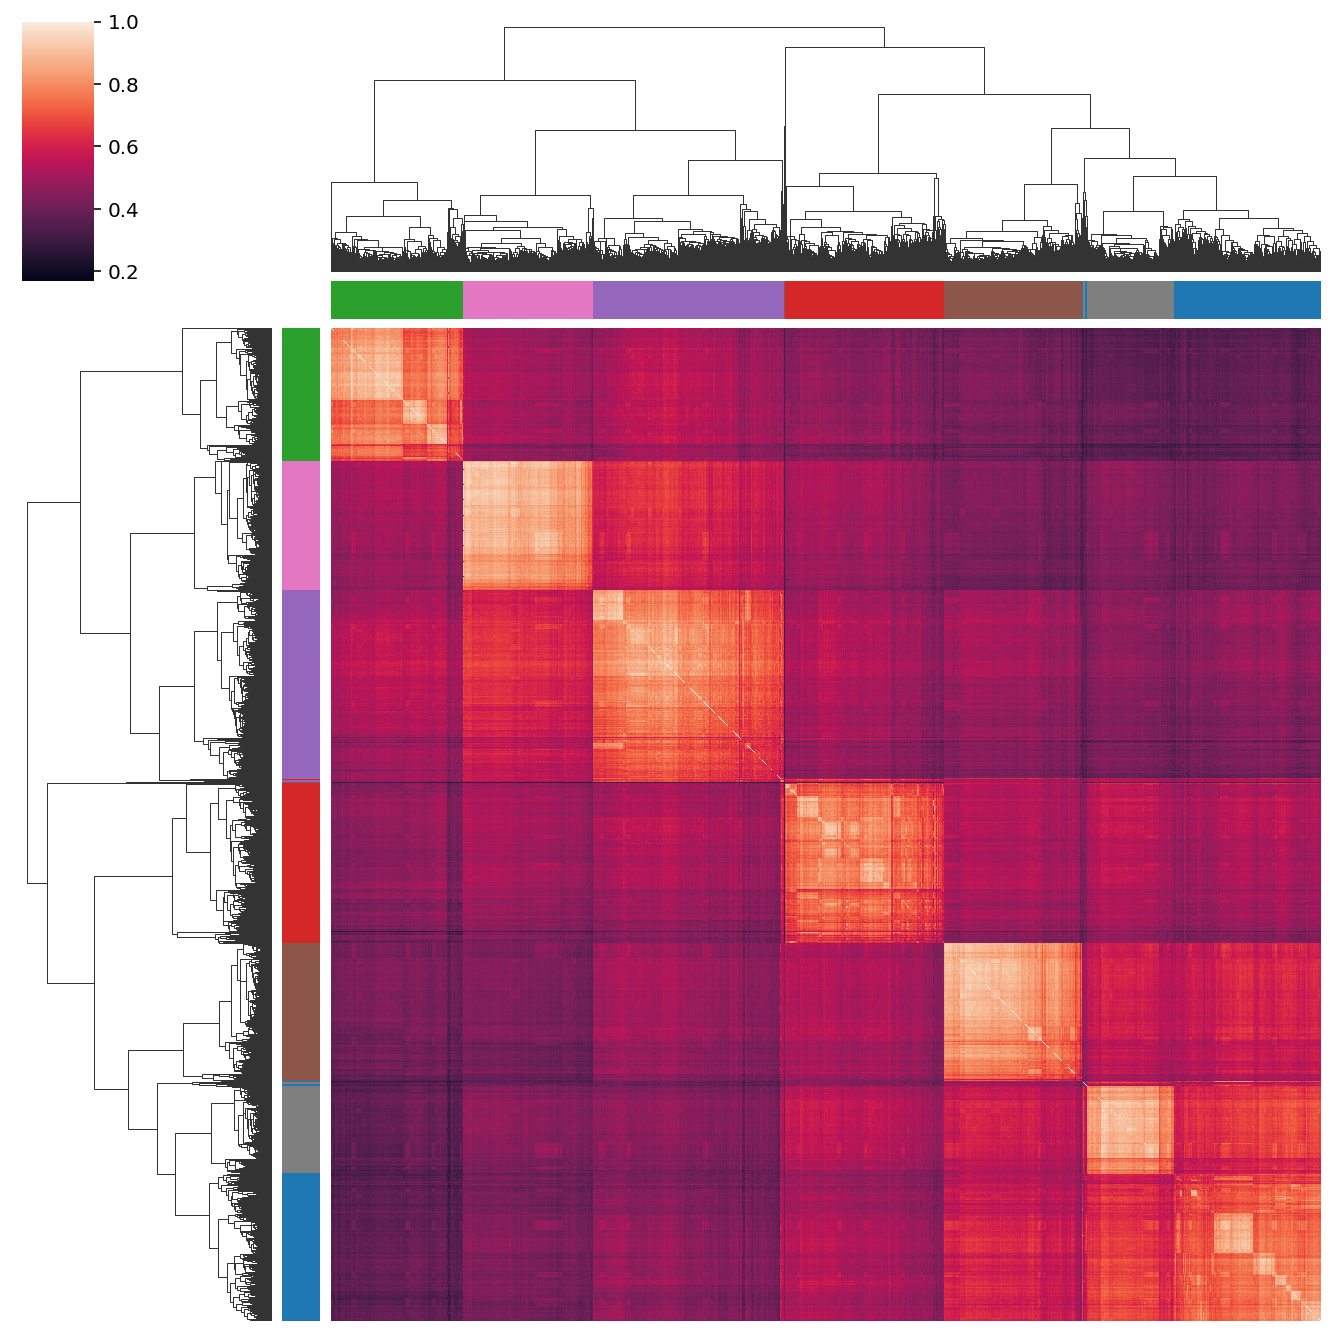

In [18]:
matrix = heavy_identity.iloc[::10,::10]
colors = heavy_subset.loc[matrix.index]['v_gene_family'].apply(HEAVY_GERMLINE_COLORS.get).values
g = sns.clustermap(matrix, row_colors=colors, col_colors=colors);
g.ax_heatmap.set_xticks([]);
g.ax_heatmap.set_yticks([]);

In [19]:
light_identity = anarci_similarity_matrix(light_subset, nproc=32, shared_positions_only=True)
light_identity

100%|██████████| 42050/42050 [2:07:54<00:00,  5.48it/s]  


80        84        33        81        93        17  \
80              1.000000  0.820801  0.766113  0.766113  0.812988  0.858398   
84              0.820801  1.000000  0.707520  0.764160  0.754883  0.820801   
33              0.766113  0.707520  1.000000  0.738281  0.794434  0.745117   
81              0.766113  0.764160  0.738281  1.000000  0.775879  0.764160   
93              0.812988  0.754883  0.794434  0.775879  1.000000  0.792480   
...                  ...       ...       ...       ...       ...       ...   
IGLV8-61*03     0.438232  0.438232  0.449463  0.438232  0.427002  0.449463   
IGLV8/OR8-1*02  0.406006  0.395996  0.406006  0.406006  0.395996  0.415771   
IGLV9-49*01     0.366455  0.376221  0.386230  0.376221  0.376221  0.336670   
IGLV9-49*02     0.366455  0.376221  0.386230  0.376221  0.376221  0.336670   
IGLV9-49*03     0.366455  0.376221  0.386230  0.376221  0.376221  0.336670   

                      36        82        69        65  ...  IGLV7-43*01  \
80              0.820801  0.747559  0.775879  0.766113  ...     0.395996   
84              0.764160  0.745117  0.745117  0.745117  ...     0.406006   
33              0.811523  0.747559  0.916016  0.906738  ...     0.415771   
81              0.868164  0.719727  0.738281  0.729004  ...     0.435547   
93              0.839844  0.812988  0.803711  0.803711  ...     0.435547   
...                  ...       ...       ...       ...  ...          ...   
IGLV8-61*03     0.460693  0.415771  0.460693  0.471924  ...     0.528809   
IGLV8/OR8-1*02  0.425781  0.386230  0.406006  0.415771  ...     0.491455   
IGLV9-49*01     0.376221  0.366455  0.376221  0.366455  ...     0.324463   
IGLV9-49*02     0.376221  0.366455  0.376221  0.366455  ...     0.324463   
IGLV9-49*03     0.376221  0.366455  0.376221  0.366455  ...     0.324463   

                IGLV7-46*01  IGLV7-46*02  IGLV8-61*01  IGLV8-61*02  \
80                 0.395996     0.386230     0.415771     0.406006   
84                 0.406006     0.395996     0.415771     0.406006   
33                 0.415771     0.406006     0.425781     0.415771   
81                 0.435547     0.425781     0.415771     0.406006   
93                 0.435547     0.425781     0.406006     0.395996   
...                     ...          ...          ...          ...   
IGLV8-61*03        0.538574     0.538574     0.788574     0.778809   
IGLV8/OR8-1*02     0.474121     0.474121     0.663574     0.655273   
IGLV9-49*01        0.315674     0.315674     0.385986     0.377197   
IGLV9-49*02        0.315674     0.315674     0.385986     0.377197   
IGLV9-49*03        0.315674     0.315674     0.385986     0.377197   

                IGLV8-61*03  IGLV8/OR8-1*02  IGLV9-49*01  IGLV9-49*02  \
80                 0.438232        0.406006     0.366455     0.366455   
84                 0.438232        0.395996     0.376221     0.376221   
33                 0.449463        0.406006     0.386230     0.386230   
81                 0.438232        0.406006     0.376221     0.376221   
93                 0.427002        0.395996     0.376221     0.376221   
...                     ...             ...          ...          ...   
IGLV8-61*03        0.788574        0.644043     0.372559     0.372559   
IGLV8/OR8-1*02     0.644043        0.810547     0.342041     0.342041   
IGLV9-49*01        0.372559        0.342041     0.814941     0.814941   
IGLV9-49*02        0.372559        0.342041     0.814941     0.814941   
IGLV9-49*03        0.372559        0.342041     0.814941     0.814941   

                IGLV9-49*03  
80                 0.366455  
84                 0.376221  
33                 0.386230  
81                 0.376221  
93                 0.376221  
...                     ...  
IGLV8-61*03        0.372559  
IGLV8/OR8-1*02     0.342041  
IGLV9-49*01        0.814941  
IGLV9-49*02        0.814941  
IGLV9-49*03        0.814941  

[42050 rows x 42050 columns]

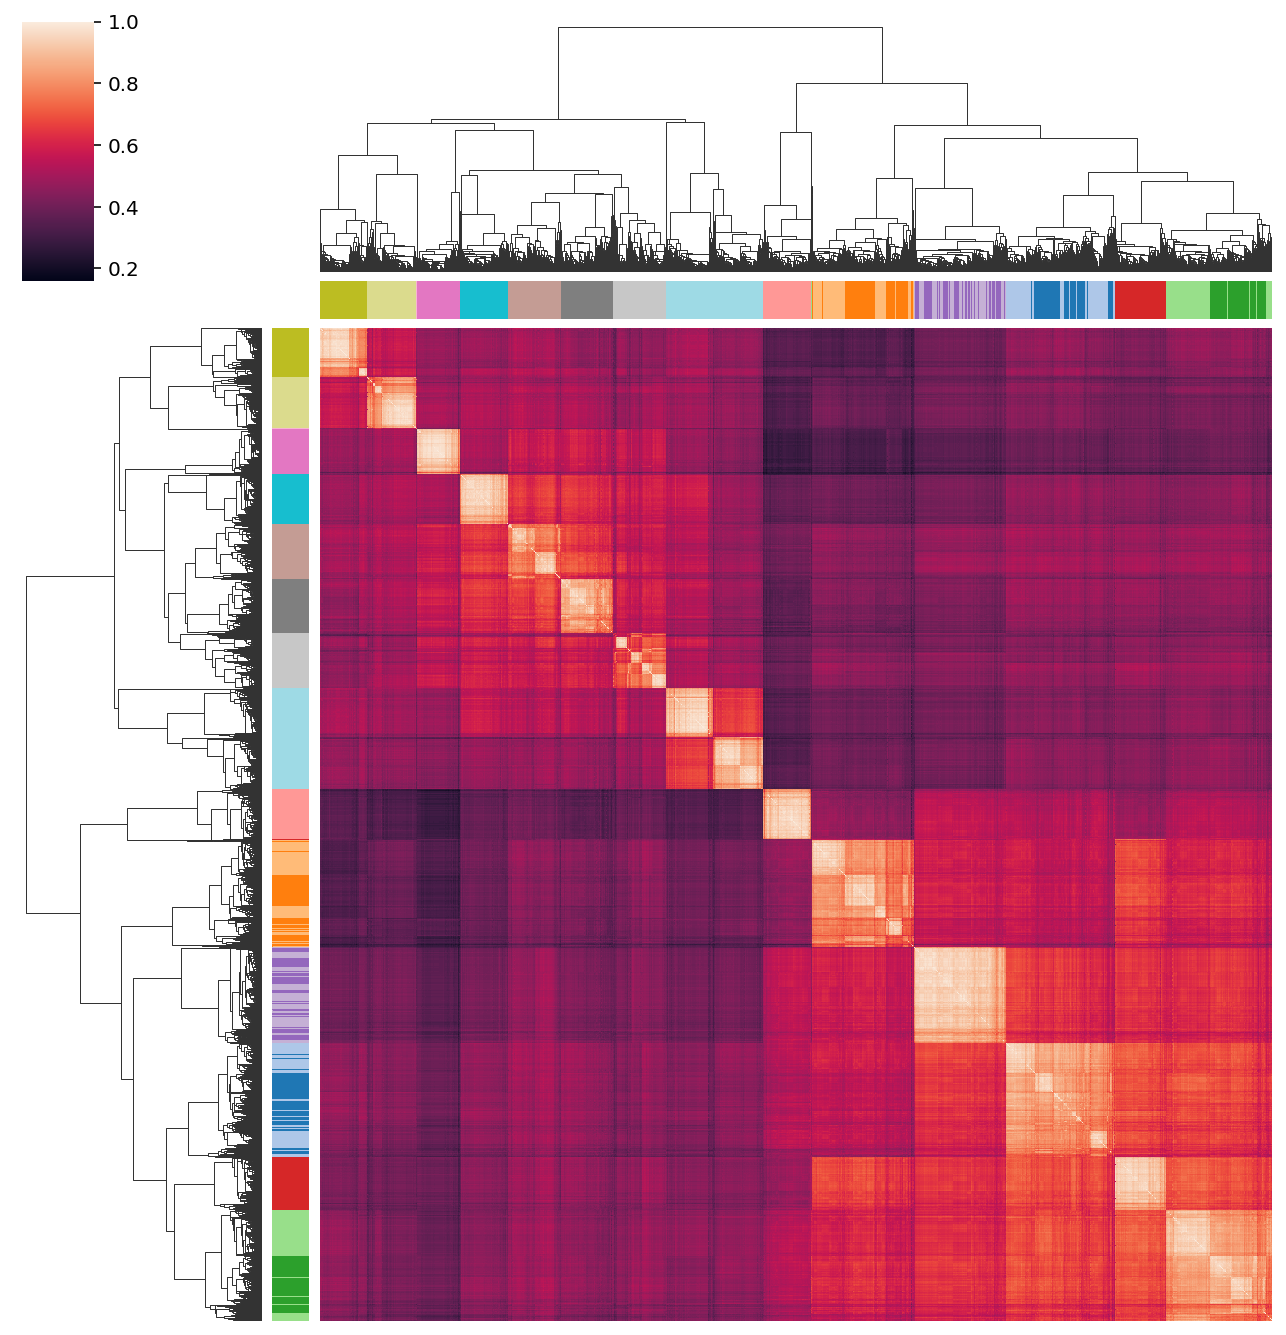

In [20]:
matrix = light_identity.iloc[::10,::10]
colors = light_subset.loc[matrix.index]['v_gene_family'].apply(LIGHT_GERMLINE_COLORS.get).values
g = sns.clustermap(matrix, row_colors=colors, col_colors=colors);
g.ax_heatmap.set_xticks([]);
g.ax_heatmap.set_yticks([]);

In [21]:
def fit_umap(df, n_components=2, random_state=0, **kwargs):
    embedding = umap.UMAP(n_components=n_components, random_state=random_state, metric='precomputed', **kwargs).fit_transform(df)
    return pd.DataFrame(embedding, columns=[f'UMAP-{i+1}' for i in range(n_components)], index=df.index)

def fit_tsne(df, n_components=2, random_state=0, **kwargs):
    embedding = TSNE(n_components=n_components, random_state=random_state, metric='precomputed', **kwargs).fit_transform(df)
    return pd.DataFrame(embedding, columns=[f't-SNE {i+1}' for i in range(n_components)], index=df.index)

## UMAP

In [22]:
heavy_umap = fit_umap(1-heavy_identity, n_neighbors=150, min_dist=1.0, spread=20)
heavy_umap = heavy_umap.join(heavy_subset)
heavy_umap.head()

/SFS/user/wp/prihodad/git/oas-humanization/condaenv/lib/python3.8/site-packages/umap/umap_.py:1330: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
/SFS/user/wp/prihodad/git/oas-humanization/condaenv/lib/python3.8/site-packages/umap/umap_.py:1735: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  warn(


UMAP-1     UMAP-2   study_path           subject  \
80  42.792439  15.185617  Bernat_2019  Bernat_2019:A007   
84  65.875359  10.700326  Bernat_2019  Bernat_2019:A007   
33  40.056931  13.530003  Bernat_2019  Bernat_2019:A007   
81  73.374763   0.632563  Bernat_2019  Bernat_2019:A007   
93  62.685246  10.706109  Bernat_2019  Bernat_2019:A007   

                                            unit_path chain_type  \
80  Bernat_2019_Heavy_IGHG_Heavy_IgG_A007_igblastn...          H   
84  Bernat_2019_Heavy_IGHG_Heavy_IgG_A007_igblastn...          H   
33  Bernat_2019_Heavy_IGHM_Heavy_IgM_A007_igblastn...          H   
81  Bernat_2019_Heavy_IGHM_Heavy_IgM_A007_igblastn...          H   
93  Bernat_2019_Heavy_IGHG_Heavy_IgG_A007_igblastn...          H   

   v_gene_family       v_gene j_gene_family    j_gene  ... 128 domain_no  \
80         IGHV1  IGHV1-46*01         IGHV1  IGHJ4*02  ...   S       NaN   
84         IGHV1  IGHV1-69*02         IGHV1  IGHJ4*02  ...   S       NaN   
33         IGHV1  IGHV1-46*01         IGHV1  IGHJ2*01  ...   S       NaN   
81         IGHV1  IGHV1-18*01         IGHV1  IGHJ2*01  ...   S       NaN   
93         IGHV1  IGHV1-69*02         IGHV1  IGHJ4*02  ...   S       NaN   

   hmm_species e-value score seqstart_index seqend_index identity_species  \
80         NaN     NaN   NaN            NaN          NaN              NaN   
84         NaN     NaN   NaN            NaN          NaN              NaN   
33         NaN     NaN   NaN            NaN          NaN              NaN   
81         NaN     NaN   NaN            NaN          NaN              NaN   
93         NaN     NaN   NaN            NaN          NaN              NaN   

   v_identity j_identity  
80        NaN        NaN  
84        NaN        NaN  
33        NaN        NaN  
81        NaN        NaN  
93        NaN        NaN  

[5 rows x 171 columns]

In [23]:
light_umap = fit_umap(1-light_identity, n_neighbors=200, min_dist=1.0, spread=20)
light_umap = light_umap.join(light_subset)
light_umap.head()

/SFS/user/wp/prihodad/git/oas-humanization/condaenv/lib/python3.8/site-packages/umap/umap_.py:1330: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
/SFS/user/wp/prihodad/git/oas-humanization/condaenv/lib/python3.8/site-packages/umap/umap_.py:1735: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  warn(


UMAP-1     UMAP-2   study_path           subject  \
80  -4.535329  27.429569  Bernat_2019  Bernat_2019:A007   
84  -2.675264  24.461090  Bernat_2019  Bernat_2019:A007   
33  -0.741606  58.698910  Bernat_2019  Bernat_2019:A007   
81   1.307230  45.958523  Bernat_2019  Bernat_2019:A007   
93  10.857225  39.553055  Bernat_2019  Bernat_2019:A007   

                               unit_path chain_type v_gene_family  \
80  Bernat_2019_Light_IgK_Light_IgK_A007          K         IGKV1   
84  Bernat_2019_Light_IgK_Light_IgK_A007          K         IGKV1   
33  Bernat_2019_Light_IgK_Light_IgK_A007          K         IGKV1   
81  Bernat_2019_Light_IgK_Light_IgK_A007          K         IGKV1   
93  Bernat_2019_Light_IgK_Light_IgK_A007          K         IGKV1   

         v_gene j_gene_family    j_gene  ... 127 domain_no hmm_species  \
80   IGKV1-5*03         IGKV1  IGKJ1*01  ...   K       NaN         NaN   
84   IGKV1-5*03         IGKV1  IGKJ3*01  ...   E       NaN         NaN   
33   IGKV1-8*01         IGKV1  IGKJ2*01  ...   K       NaN         NaN   
81   IGKV1-9*01         IGKV1  IGKJ5*01  ...   K       NaN         NaN   
93  IGKV1-17*01         IGKV1  IGKJ1*01  ...   K       NaN         NaN   

   e-value score seqstart_index seqend_index identity_species v_identity  \
80     NaN   NaN            NaN          NaN              NaN        NaN   
84     NaN   NaN            NaN          NaN              NaN        NaN   
33     NaN   NaN            NaN          NaN              NaN        NaN   
81     NaN   NaN            NaN          NaN              NaN        NaN   
93     NaN   NaN            NaN          NaN              NaN        NaN   

   j_identity  
80        NaN  
84        NaN  
33        NaN  
81        NaN  
93        NaN  

[5 rows x 158 columns]

In [66]:
heavy_umap.to_csv('../../data/oas_stats/sequence_similarity/oas_40k_umap_heavy.csv')
light_umap.to_csv('../../data/oas_stats/sequence_similarity/oas_40k_umap_light.csv')

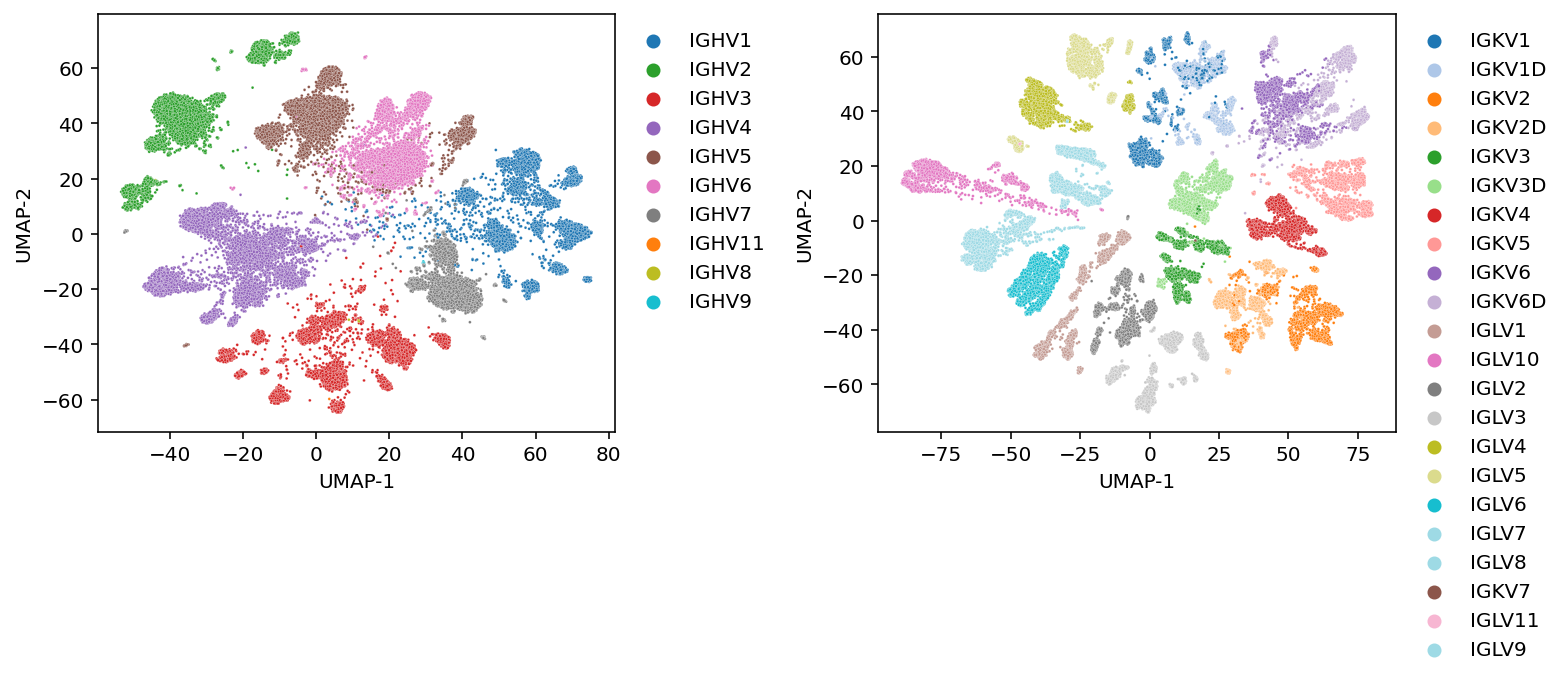

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4.5))
ax = sns.scatterplot(
    data=heavy_umap,
    x='UMAP-1',
    y='UMAP-2',
    hue='v_gene_family',
    palette=HEAVY_GERMLINE_COLORS,
    s=2,
    ax=axes[0]
);
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False);
ax = sns.scatterplot(
    data=light_umap,
    x='UMAP-1',
    y='UMAP-2',
    hue='v_gene_family',
    palette=LIGHT_GERMLINE_COLORS,
    s=2,
    ax=axes[1]
);
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False);
fig.tight_layout();

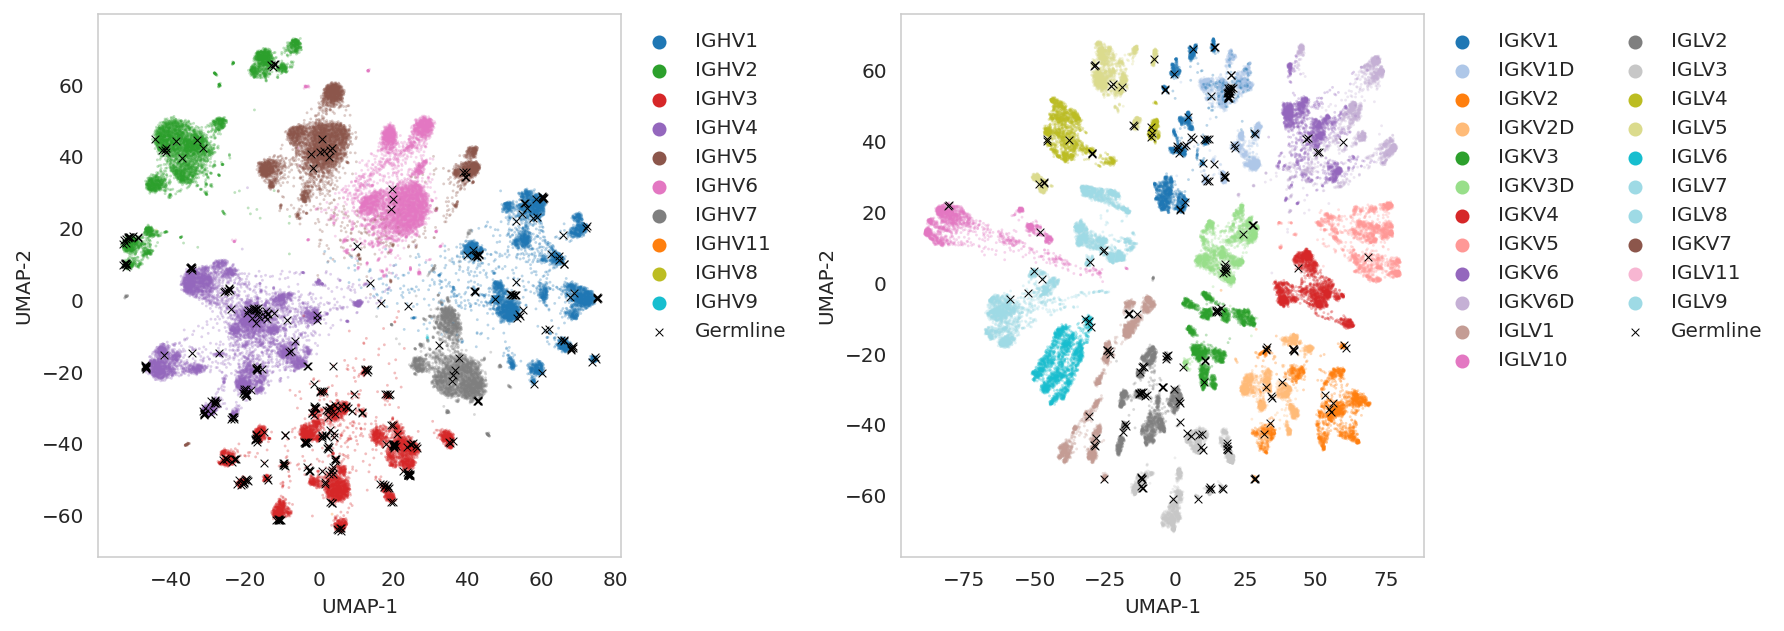

In [63]:
with sns.axes_style('whitegrid'):
    plt.rcParams["axes.grid"] = False
    fig, axes = plt.subplots(1, 2, figsize=(12.5, 4.5))
    ax = sns.scatterplot(
        data=heavy_umap,
        x='UMAP-1',
        y='UMAP-2',
        hue='v_gene_family',
        palette=HEAVY_GERMLINE_COLORS,
        s=2,
        linewidth=0,
        alpha=0.3,
        ax=axes[0]
    );
    ax = sns.scatterplot(
        data=light_umap,
        x='UMAP-1',
        y='UMAP-2',
        hue='v_gene_family',
        palette=LIGHT_GERMLINE_COLORS,
        s=2,
        linewidth=0,
        alpha=0.3,
        ax=axes[1]
    );

    ax = sns.scatterplot(
        data=heavy_umap[heavy_umap['subject'] == 'germline'],
        x='UMAP-1',
        y='UMAP-2',
        s=15,
        color='black',
        marker='x',
        linewidth=0.5,
        #alpha=0.2,
        label='Germline',
        ax=axes[0]
    );
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False);

    ax = sns.scatterplot(
        data=light_umap[light_umap['subject'] == 'germline'],
        x='UMAP-1',
        y='UMAP-2',
        s=15,
        color='black',
        marker='x',
        linewidth=0.5,
        label='Germline',
        ax=axes[1]
    );
    ax.legend(loc='upper left', ncol=2, bbox_to_anchor=(1, 1), frameon=False);
    fig.tight_layout();


In [46]:
light_germlines[light_germlines['v_gene_family'] == 'IGKV5']

study_path   subject v_gene_family  domain_no hmm_species  \
Id                                                                     
IGKV5-2*01   germline  germline         IGKV5          0       human   

           chain_type       e-value  score  seqstart_index  seqend_index  ...  \
Id                                                                        ...   
IGKV5-2*01          K  3.200000e-42  134.6               0            91  ...   

            108  109  110  111  112 113 114 115 116 117  
Id                                                       
IGKV5-2*01    -    -    -    -    -   -   -   -   H   D  

[1 rows x 132 columns]

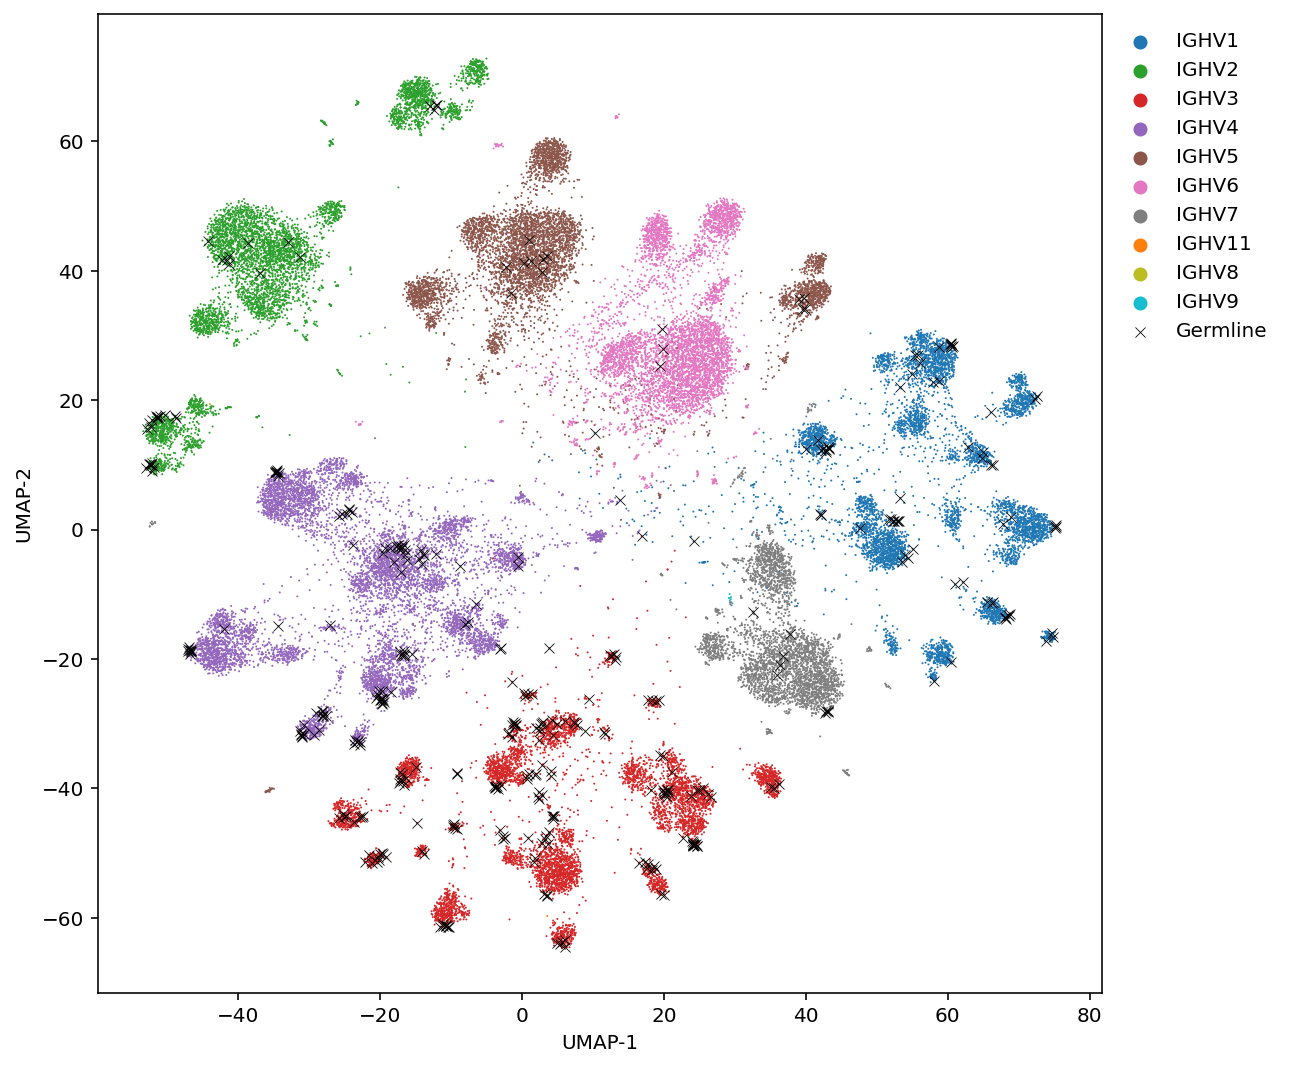

In [59]:
fig, ax = plt.subplots(figsize=(9, 9))
ax = sns.scatterplot(
    data=heavy_umap,
    x='UMAP-1',
    y='UMAP-2',
    hue='v_gene_family',
    palette=HEAVY_GERMLINE_COLORS,
    s=1,
    linewidth=0,
    alpha=1,
    ax=ax
);
ax = sns.scatterplot(
    data=heavy_umap[heavy_umap['subject'] == 'germline'],
    x='UMAP-1',
    y='UMAP-2',
    s=25,
    color='black',
    marker='x',
    label='Germline',
    ax=ax
);
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False);

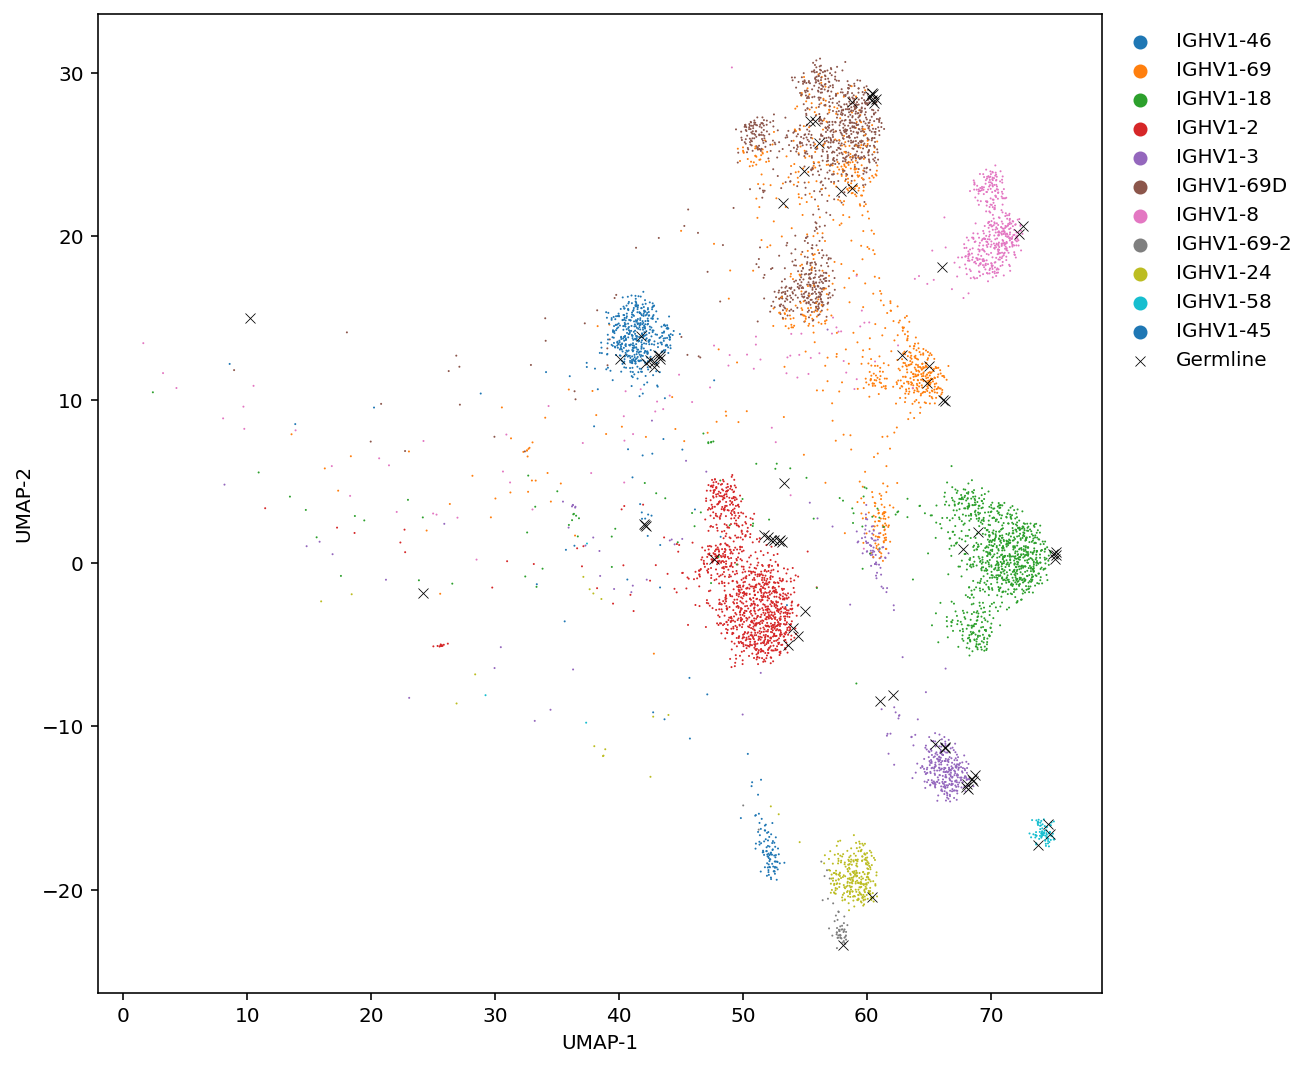

In [54]:
umap = heavy_umap[heavy_umap['v_gene_family'] == 'IGHV1']
fig, ax = plt.subplots(figsize=(9, 9))
data = umap[umap['subject'] != 'germline']
ax = sns.scatterplot(
    data=data,
    x='UMAP-1',
    y='UMAP-2',
    hue=data['v_gene'].apply(lambda s: s.split('*')[0]),
    palette='tab10',
    s=1,
    linewidth=0,
    alpha=1,
    ax=ax
);
ax = sns.scatterplot(
    data=umap[umap['subject'] == 'germline'],
    x='UMAP-1',
    y='UMAP-2',
    s=25,
    color='black',
    marker='x',
    label='Germline',
    ax=ax
);
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False);

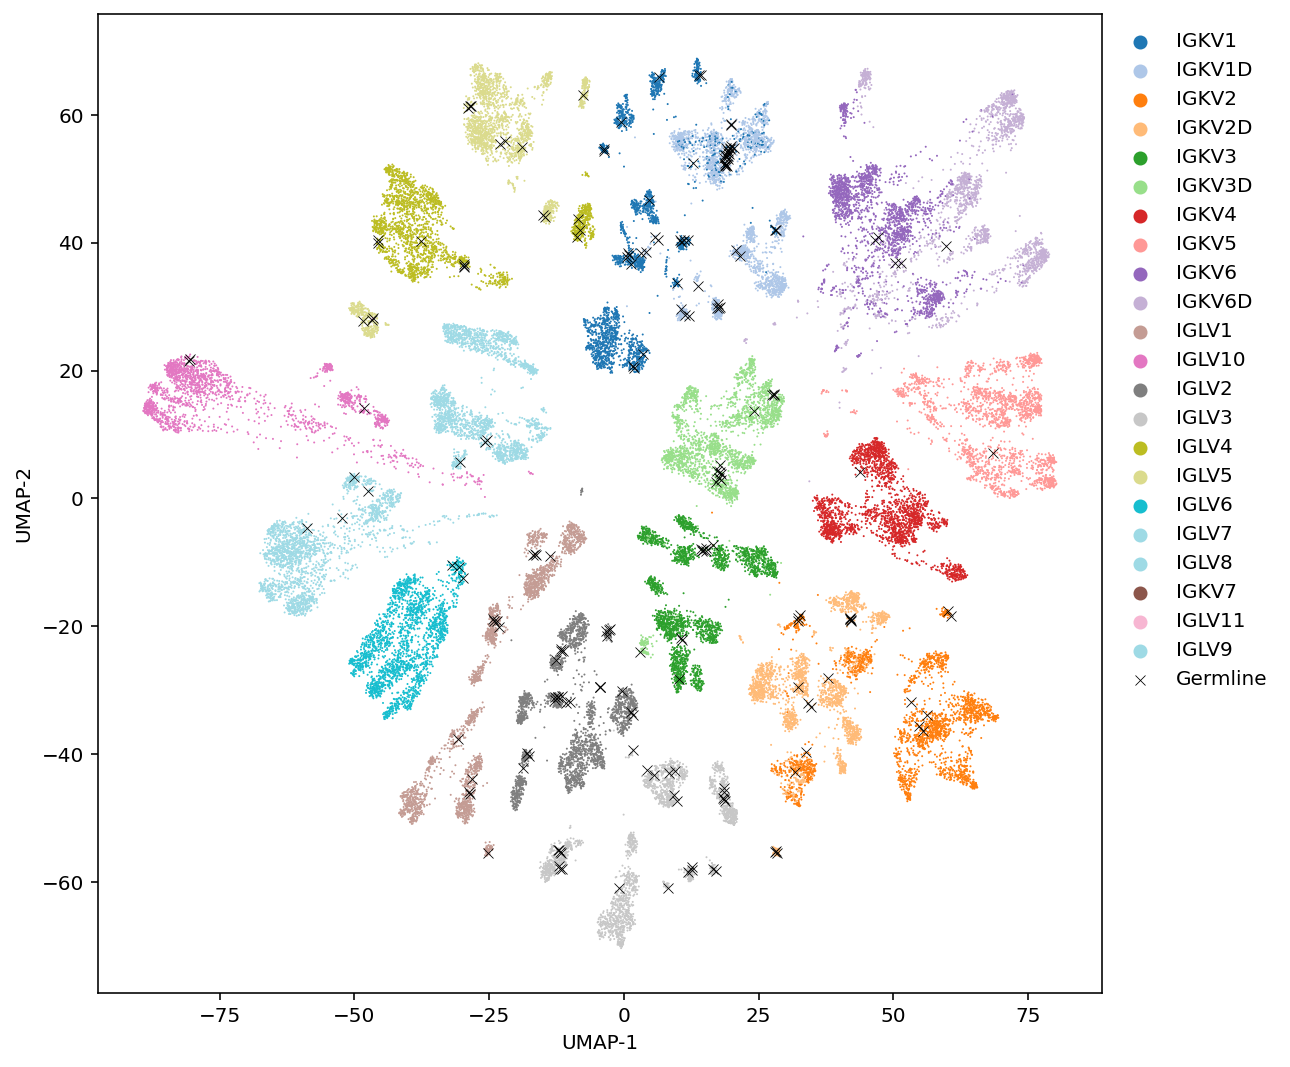

In [55]:
fig, ax = plt.subplots(figsize=(9, 9))
ax = sns.scatterplot(
    data=light_umap,
    x='UMAP-1',
    y='UMAP-2',
    hue='v_gene_family',
    palette=LIGHT_GERMLINE_COLORS,
    s=1,
    linewidth=0,
    alpha=1,
    ax=ax
);
ax = sns.scatterplot(
    data=light_umap[light_umap['subject'] == 'germline'],
    x='UMAP-1',
    y='UMAP-2',
    s=25,
    color='black',
    marker='x',
    label='Germline',
    ax=ax
);
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False);

In [64]:
# fig, axes = plt.subplots(1, 2, figsize=(11, 4.5))
ax = sns.scatterplot(
    data=heavy_umap,
    x='UMAP-1',
    y='UMAP-2',
    hue='subject',
    palette='tab20',
    s=2,
    #linewidth=0,
    #alpha=0.2,
    ax=axes[0]
);
ax.legend().remove();
ax = sns.scatterplot(
    data=light_umap,
    x='UMAP-1',
    y='UMAP-2',
    hue='subject',
    palette='tab20',
    s=2,
    ax=axes[1]
);
ax.legend().remove();
fig.tight_layout();

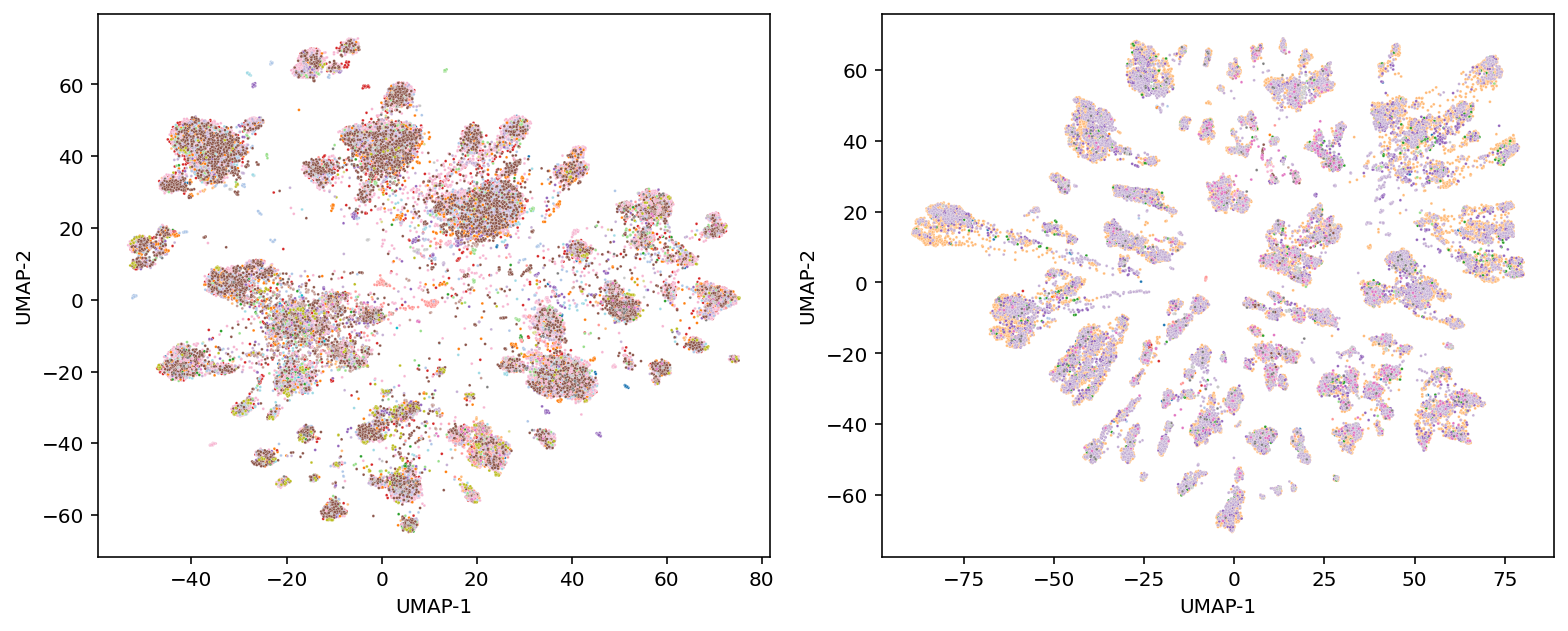

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(11, 4.5))
ax = sns.scatterplot(
    data=heavy_umap,
    x='UMAP-1',
    y='UMAP-2',
    hue='study_path',
    palette='tab20',
    s=2,
    #linewidth=0,
    #alpha=0.2,
    ax=axes[0]
);
ax.legend().remove();
ax = sns.scatterplot(
    data=light_umap,
    x='UMAP-1',
    y='UMAP-2',
    hue='study_path',
    palette='tab20',
    s=2,
    ax=axes[1]
);
ax.legend().remove();
fig.tight_layout();